In [1]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [2]:
# 제출 점수(제출 날짜) : 0.6439491619(2021-12-21 10:37:23)

# 설정

In [3]:
# 'id', 'contents_open_dt' 제거 : ⭕
# 모든 값이 1인 'person_prefer_f', 'person_prefer_g' 열 제거 : ⭕
# person_rn, contents_rn 제거 : ❌
# 중복 샘플 제거 : ❌

In [4]:
# 차이가 비교적 많이 나는 특성(25개)만 훈련/예측 : ❌

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h

In [5]:
# pycaret, cat
# tune : ❌(자체 점수 떨어짐.)
# combine
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

# 데이터 불러오기

In [6]:
# ../data/train.csv
# ../data/test.csv
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [8]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [10]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [11]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [12]:
# test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
#  'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
#  'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
#  'person_prefer_e',
#  'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
#  'contents_attribute_i', 'contents_attribute_a',
#  'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
#  'contents_attribute_l', 'contents_attribute_d',
#  'contents_attribute_m', 'contents_attribute_e',
#  'contents_attribute_h']
# target = ['target']
# train_col = test_col + target
# len(train_col), len(test_col)

In [13]:
# train = train[train_col]
# test = test[test_col]

In [14]:
train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1) 
test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_attribute_b      46404 non-null  int64
 9   person_prefer_c         46404 non-null  int64
 10  person_prefer_d_1       46404 non-null  int64
 11  person_prefer_d_2       46404 non-null  int64
 12  person_prefer_d_3       46404 non-null  int64
 13  person_prefer_e         46404 non-null  int64
 14  person_prefer_h_1       46404 non-null  int64
 15  person_prefer_h_2  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [17]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0


In [18]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413


# 모델 학습/예측

In [19]:
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [20]:
ex = setup(train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
 fold=5, fold_shuffle=True, combine_rare_levels=True,
 numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'])

In [21]:
compare_models(sort='F1')
# 29m

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6246,0.6735,0.6717,0.6136,0.6414,0.2493,0.2504,55.0540
lightgbm,Light Gradient Boosting Machine,0.6141,0.6609,0.6696,0.6024,0.6342,0.2283,0.2297,7.2320
rf,Random Forest Classifier,0.6134,0.6600,0.6226,0.6110,0.6167,0.2267,0.2268,50.2460
gbc,Gradient Boosting Classifier,0.6008,0.6428,0.6383,0.5934,0.6151,0.2016,0.2021,77.2020
ada,Ada Boost Classifier,0.5931,0.6323,0.6180,0.5884,0.6028,0.1863,0.1865,16.2860
et,Extra Trees Classifier,0.5959,0.6355,0.5915,0.5964,0.5940,0.1918,0.1918,74.3400
ridge,Ridge Classifier,0.5867,0.0000,0.6025,0.5837,0.5930,0.1735,0.1736,0.4460
lda,Linear Discriminant Analysis,0.5867,0.6210,0.6025,0.5837,0.5930,0.1735,0.1736,3.0940
dt,Decision Tree Classifier,0.5501,0.5501,0.5506,0.5497,0.5502,0.1002,0.1002,4.8380
knn,K Neighbors Classifier,0.5301,0.5396,0.5466,0.5288,0.5375,0.0602,0.0603,9.3740


In [26]:
model = create_model('catboost')
# 5m 56s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6224,0.6716,0.6687,0.6118,0.6390,0.2449,0.2460
1,0.6239,0.6728,0.6722,0.6126,0.6410,0.2478,0.2489
2,0.6264,0.6762,0.6716,0.6157,0.6424,0.2529,0.2540
3,0.6259,0.6742,0.6732,0.6147,0.6426,0.2518,0.2530
4,0.6245,0.6727,0.6730,0.6133,0.6417,0.2492,0.2503
Mean,0.6246,0.6735,0.6717,0.6136,0.6414,0.2493,0.2504
SD,0.0014,0.0016,0.0016,0.0014,0.0013,0.0029,0.0029


In [27]:
tuned_model = tune_model(model)
# 11m 29s
# tune : ❌

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6180,0.6653,0.6625,0.6081,0.6341,0.2361,0.2371
1,0.6171,0.6633,0.6608,0.6074,0.6329,0.2342,0.2351
2,0.6186,0.6675,0.6648,0.6083,0.6353,0.2373,0.2383
3,0.6193,0.6666,0.6616,0.6097,0.6346,0.2387,0.2395
4,0.6187,0.6649,0.6642,0.6085,0.6351,0.2374,0.2384
Mean,0.6183,0.6655,0.6628,0.6084,0.6344,0.2367,0.2377
SD,0.0008,0.0014,0.0015,0.0008,0.0008,0.0015,0.0015


In [28]:
pred = predict_model(model, test)

In [29]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,Label,Score
0,True,False,False,True,True,True,1,1,2,1,...,2,1147,839,1,5,263,393790,236865,0,0.5221
1,False,False,False,True,False,False,2,0,2,2,...,2,1611,278,1,4,263,394058,236572,0,0.6454
2,True,False,False,True,True,True,2,3,2,1,...,2,1817,490,3,4,177,1002061,704612,0,0.5523
3,True,False,False,True,True,True,1,2,2,5,...,2,101,150,5,3,177,1000813,704652,0,0.5230
4,True,False,False,True,False,False,1,6,4,5,...,1,985,1097,1,4,177,111146,704413,0,0.5106


In [30]:
pred.iloc[:,-2:].head()

,Label,Score
0,0,0.5221
1,0,0.6454
2,0,0.5523
3,0,0.5230
4,0,0.5106


In [31]:
pred['Label'].value_counts()

1    25424
0    20980
Name: Label, dtype: int64

# 제출파일 생성

In [32]:
# ../data/sample_submission.csv
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver1.6.csv', index=False)

# 모델 분석 그래프

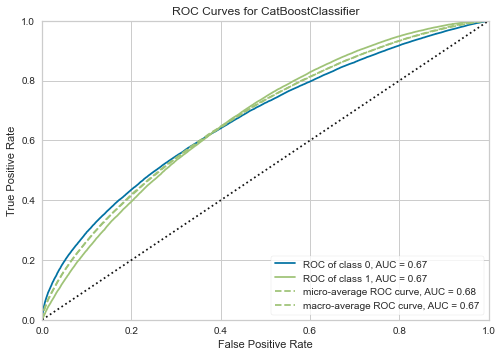

In [33]:
plot_model(model)